In [3]:
import os
import numpy as np
from PIL import Image
from keras_facenet import FaceNet

In [5]:
# Initialize the FaceNet model from keras-facenet
embedder = FaceNet()
print("FaceNet model loaded successfully!")


FaceNet model loaded successfully!


In [5]:
def preprocess_image(image_path):
    """
    Loads an image, converts it to RGB, resizes to 160x160 (FaceNet input size),
    normalizes pixel values, and adds a batch dimension.
    """
    image = Image.open(image_path).convert("RGB")
    image = image.resize((160, 160))
    image_array = np.asarray(image) / 255.0  # Normalize to [0,1]
    return np.expand_dims(image_array, axis=0)  # Shape becomes (1, 160, 160, 3)


In [6]:
def load_dataset(dataset_path):
    """
    Loads images from each subfolder under 'dataset_path/familiar/'.
    Assumes each subfolder is named after a person and contains cropped face images.
    Returns:
      - embeddings: Numpy array of embeddings for all images.
      - labels: Numpy array of corresponding person names.
    """
    embeddings = []
    labels = []
    
    # Path to the 'familiar' folder containing subfolders for each person
    familiar_path = os.path.join(dataset_path, "/kaggle/input/facenet-data/FaceNetnew")
    
    # Loop over each subfolder (each person)
    for person in os.listdir(familiar_path):
        person_folder = os.path.join(familiar_path, person)
        if not os.path.isdir(person_folder):
            continue  # Skip files if any
        
        # Process each image in the person's folder
        for image_name in os.listdir(person_folder):
            image_path = os.path.join(person_folder, image_name)
            # Skip if it's a directory (just in case)
            if os.path.isdir(image_path):
                continue
            try:
                # Preprocess the image and generate embedding
                img = preprocess_image(image_path)
                embedding = embedder.embeddings(img)[0]  # Get embedding vector
                
                embeddings.append(embedding)
                labels.append(person)
            except Exception as e:
                print(f"Error processing {image_path}: {e}")
    
    return np.array(embeddings), np.array(labels)


In [7]:
# Set the path to your dataset folder
dataset_path = "/kaggle/input/facenet-data"  # Adjust if your dataset folder is located elsewhere

# Load dataset: get embeddings and corresponding labels (person names)
embeddings, labels = load_dataset(dataset_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━

In [8]:
print("Embeddings shape:", embeddings.shape)
print("Labels shape:", labels.shape)
print("Unique persons:", np.unique(labels))


Embeddings shape: (250, 512)
Labels shape: (250,)
Unique persons: ['Ajay' 'Sree' 'hari' 'minnu' 'sneha']


In [9]:
import os
import pickle

# Define the save directory (Kaggle working directory)
save_dir = '/kaggle/working'

# Create a file path for the pickle file
save_path = os.path.join(save_dir, 'embeddings_labels.pkl')

# Save embeddings and labels as a tuple
with open(save_path, 'wb') as f:
    pickle.dump((embeddings, labels), f)

print(f"Embeddings and labels saved successfully in: {save_path}")


Embeddings and labels saved successfully in: /kaggle/working/embeddings_labels.pkl


In [10]:
import os
import numpy as np

# Define the save directory (Kaggle working directory)
save_dir = '/kaggle/working'

# Save embeddings and labels as separate .npy files
np.save(os.path.join(save_dir, 'embeddings.npy'), embeddings)
np.save(os.path.join(save_dir, 'labels.npy'), labels)

print("Embeddings and labels saved successfully as .npy files in Kaggle working directory!")


Embeddings and labels saved successfully as .npy files in Kaggle working directory!


# Evaluate

In [11]:
import pickle
import numpy as np

# Load stored embeddings and labels
with open('/kaggle/working/embeddings_labels.pkl', 'rb') as f:
    stored_embeddings, stored_labels = pickle.load(f)

print("Stored embeddings and labels loaded successfully!")


Stored embeddings and labels loaded successfully!


In [12]:
from keras_facenet import FaceNet
import cv2

# Load FaceNet model
facenet = FaceNet()

def get_embedding(image_path):
    """Extract FaceNet embedding from a given image."""
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Could not read image {image_path}")
        return None
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, (160, 160))  # Resize to FaceNet input size
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    embedding = facenet.embeddings(img)  # Extract embedding
    return embedding[0]  # Return as 1D array


In [13]:
from sklearn.metrics.pairwise import cosine_similarity

def find_best_match(test_embedding, stored_embeddings, stored_labels, threshold=0.5):
    """Find the best match for a test image using cosine similarity."""
    if test_embedding is None:
        return "Error"

    similarities = cosine_similarity([test_embedding], stored_embeddings)[0]  # Compute cosine similarity
    best_match_index = np.argmax(similarities)  # Get index of highest similarity
    best_match_score = similarities[best_match_index]  # Get best similarity score

    print(f"Best Match Score: {best_match_score:.2f}")

    if best_match_score >= threshold:
        return stored_labels[best_match_index]  # Recognized as familiar
    else:
        return "Unknown"  # Instead of "Unfamiliar," return "Unknown" for low scores


In [14]:
from sklearn.metrics import accuracy_score, classification_report

# Sample test images (all known persons)
test_images = [
    "/kaggle/input/facenet-data/FaceNetnew/Ajay/i01.jpeg",
    "/kaggle/input/facenet-data/FaceNetnew/Sree/i43.jpg",
]

true_labels = ["Ajay", "Sree"]  # Only familiar labels

predicted_labels = []

for img_path, true_label in zip(test_images, true_labels):
    test_embedding = get_embedding(img_path)  # Extract embedding
    predicted_label = find_best_match(test_embedding, stored_embeddings, stored_labels)
    predicted_labels.append(predicted_label)
    print(f"True: {true_label} | Predicted: {predicted_label}")

# Evaluate model performance
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy:.2f}")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels))


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Best Match Score: -0.05
True: Ajay | Predicted: Unknown
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Best Match Score: 0.18
True: Sree | Predicted: Unknown
Accuracy: 0.00

Classification Report:
              precision    recall  f1-score   support

        Ajay       0.00      0.00      0.00       1.0
        Sree       0.00      0.00      0.00       1.0
     Unknown       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [15]:
e1 = get_embedding("/kaggle/input/facenet-data/PImg/Familiar/Sneha/i32.jpg")
e2 = get_embedding("/kaggle/input/facenet-data/PImg/Familiar/Sneha/i32.jpg")  # Same image

similarity = cosine_similarity([e1], [e2])[0][0]
print(f"Self-Similarity: {similarity:.2f}")  # Should be close to 1.0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Self-Similarity: 1.00


In [16]:
# Load stored embeddings
stored_embeddings = np.load("/kaggle/working/embeddings.npy")
stored_labels = np.load("/kaggle/working/labels.npy")

# Debug: Print first stored embedding values
print("Stored Embeddings (first 5 values):", stored_embeddings[0][:5])
print("Norm of first stored embedding:", np.linalg.norm(stored_embeddings[0]))  # Should be ~1.0


Stored Embeddings (first 5 values): [ 0.01040816  0.01323743 -0.08136161  0.03703691 -0.00583528]
Norm of first stored embedding: 0.99999994


# with augmentation

In [6]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras_facenet import FaceNet  # pip install keras-facenet
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


In [7]:
def load_images_from_folder(folder, target_size=(160, 160)):
    images = []
    labels = []
    # Each subfolder is assumed to be one class (person)
    for label in os.listdir(folder):
        label_path = os.path.join(folder, label)
        if os.path.isdir(label_path):
            for file in os.listdir(label_path):
                img_path = os.path.join(label_path, file)
                img = cv2.imread(img_path)
                if img is not None:
                    # Convert BGR (OpenCV) to RGB
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    # Resize to the target dimensions (FaceNet expects 160x160)
                    img = cv2.resize(img, target_size)
                    images.append(img)
                    labels.append(label)
    return np.array(images), np.array(labels)

# Change 'your_dataset_folder' to your actual dataset directory
folder_path = '/kaggle/input/facenet-data/FaceNetnew'
images, labels = load_images_from_folder(folder_path)
print("Loaded {} images from {} classes.".format(len(images), len(np.unique(labels))))


Loaded 250 images from 5 classes.


In [8]:
import os
import cv2
import numpy as np

def load_images_from_folder(folder, target_size=(160, 160)):
    images = []
    labels = []
    for label in os.listdir(folder):
        label_path = os.path.join(folder, label)
        if os.path.isdir(label_path):
            for file in os.listdir(label_path):
                img_path = os.path.join(label_path, file)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    img = cv2.resize(img, target_size)
                    images.append(img)
                    labels.append(label)
    return np.array(images), np.array(labels)

# Load data
folder_path = '/kaggle/input/facenet-data/FaceNetnew'
images, labels = load_images_from_folder(folder_path)

# Verify data
print("Loaded {} images from {} classes.".format(len(images), len(np.unique(labels))))
print("Images shape:", images.shape)  # Should be (250, 160, 160, 3)
print("Labels shape:", labels.shape)  # Should be (250,)
print("First few labels:", labels[:5])  # Check some label values

Loaded 250 images from 5 classes.
Images shape: (250, 160, 160, 3)
Labels shape: (250,)
First few labels: ['sneha' 'sneha' 'sneha' 'sneha' 'sneha']


In [9]:
datagen = ImageDataGenerator(
    rotation_range=10,          # rotate images by up to 10 degrees
    width_shift_range=0.1,      # shift images horizontally by up to 10%
    height_shift_range=0.1,     # shift images vertically by up to 10%
    shear_range=0.1,            # apply shearing transformations
    zoom_range=0.1,             # zoom in/out by up to 10%
    horizontal_flip=True,       # randomly flip images horizontally
    fill_mode='nearest'         # fill in missing pixels
)


In [10]:
import os
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define augmentation settings
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create new arrays for augmented images and labels
augmented_images = []
augmented_labels = []

# Generate 5 augmented versions per image
num_augments_per_image = 5

for i in range(len(images)):  # Iterate over each original image
    img = images[i]  # Get original image
    img = np.expand_dims(img, axis=0)  # Reshape to (1, height, width, channels)
    
    aug_iter = datagen.flow(img, batch_size=1)  # Generate augmented images
    for _ in range(num_augments_per_image):
        aug_img = next(aug_iter)[0].astype(np.uint8)  # Convert to uint8 format
        augmented_images.append(aug_img)
        augmented_labels.append(labels[i])  # Keep the same label

# Convert to NumPy arrays
augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

# Display the total number of images
print("Original images:", len(images))
print("Augmented images generated:", len(augmented_images))
print("Total images after augmentation:", len(images) + len(augmented_images))


Original images: 250
Augmented images generated: 1250
Total images after augmentation: 1500


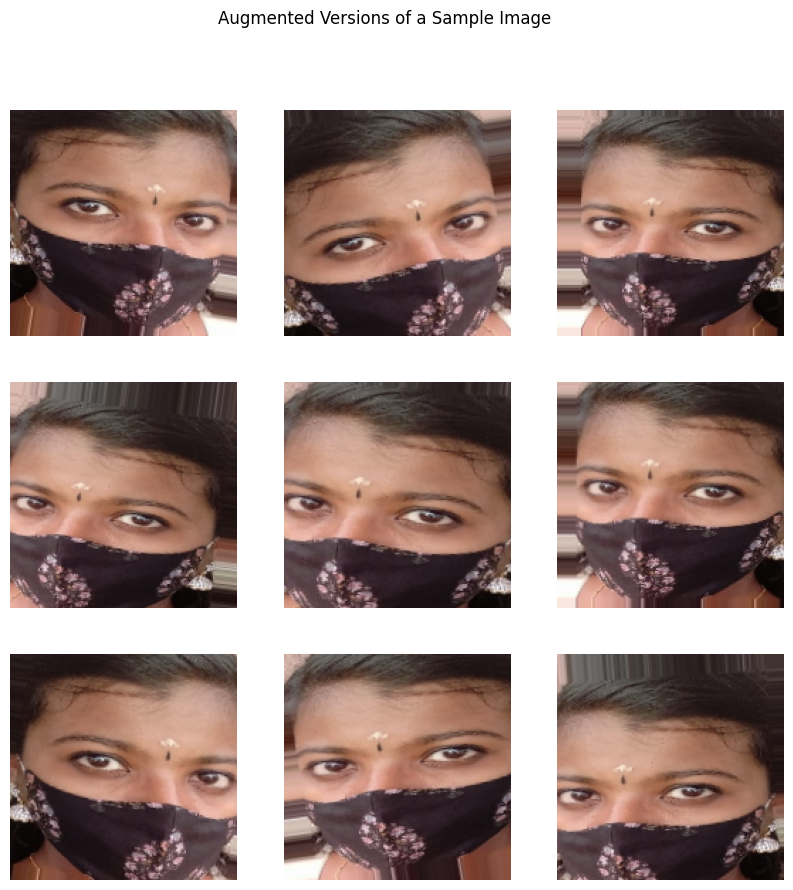

In [11]:
sample_img = images[0]  # pick a sample image
plt.figure(figsize=(10, 10))
aug_iter = datagen.flow(np.expand_dims(sample_img, 0), batch_size=1)

for i in range(9):
    aug_img = next(aug_iter)[0].astype('uint8')
    plt.subplot(3, 3, i+1)
    plt.imshow(aug_img)
    plt.axis('off')
plt.suptitle("Augmented Versions of a Sample Image")
plt.show()


In [12]:
embedder = FaceNet()  # loads the pre-trained FaceNet model


In [13]:
def get_augmented_embedding(image, embedder, datagen, n_augmentations=5):
    # Get embedding from the original image
    emb_list = [embedder.embeddings([image])[0]]
    
    # Generate augmented images and extract their embeddings
    aug_iter = datagen.flow(np.expand_dims(image, 0), batch_size=1, shuffle=False)
    for _ in range(n_augmentations):
        aug_img = next(aug_iter)[0].astype('uint8')
        emb = embedder.embeddings([aug_img])[0]
        emb_list.append(emb)
        
    # Return the average embedding
    return np.mean(emb_list, axis=0)

# Example: compute and display the embedding dimension
sample_embedding = get_augmented_embedding(sample_img, embedder, datagen, n_augmentations=5)
print("Embedding dimension:", sample_embedding.shape)


1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Embedding dimension: (512,)


In [14]:
# Assuming embedder, datagen are defined elsewhere (e.g., FaceNet model and data generator)
all_embeddings = []
for img in images:
    emb = get_augmented_embedding(img, embedder, datagen, n_augmentations=5)
    all_embeddings.append(emb)
all_embeddings = np.array(all_embeddings)

# Check embeddings
print("Computed embeddings for {} images.".format(len(all_embeddings)))
print("Embeddings shape:", all_embeddings.shape)  # Should be (250, 512) for FaceNet
print("Shape of first embedding:", all_embeddings[0].shape)  # Should be (512,)
print("First embedding values (first 5):", all_embeddings[0][:5])  # Sample values

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━

# Saving embeddings

In [15]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import pickle

# Step 1: Load images and labels (already done)
def load_images_from_folder(folder, target_size=(160, 160)):
    images = []
    labels = []
    for label in os.listdir(folder):
        label_path = os.path.join(folder, label)
        if os.path.isdir(label_path):
            for file in os.listdir(label_path):
                img_path = os.path.join(label_path, file)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    img = cv2.resize(img, target_size)
                    images.append(img)
                    labels.append(label)
    return np.array(images), np.array(labels)

folder_path = '/kaggle/input/facenet-data/FaceNetnew'
images, labels = load_images_from_folder(folder_path)
print("Loaded {} images from {} classes.".format(len(images), len(np.unique(labels))))
print("Images shape:", images.shape)
print("Labels shape:", labels.shape)
print("First few labels:", labels[:5])

# Step 2: Compute embeddings (already done)
all_embeddings = []
for img in images:
    emb = get_augmented_embedding(img, embedder, datagen, n_augmentations=5)
    all_embeddings.append(emb)
all_embeddings = np.array(all_embeddings)
print("Computed embeddings for {} images.".format(len(all_embeddings)))
print("Embeddings shape:", all_embeddings.shape)
print("Shape of first embedding:", all_embeddings[0].shape)
print("First embedding values (first 5):", all_embeddings[0][:5])

# Step 3: Encode labels
le = LabelEncoder()
y = le.fit_transform(labels)
print("Encoded labels shape:", y.shape)  # Should be (250,)
print("Label encoder classes:", le.classes_)  # Should be 5 unique classes
print("First few encoded labels:", y[:5])

# Step 4: Scale embeddings
scaler = StandardScaler()
X = scaler.fit_transform(all_embeddings)
print("Scaled embeddings shape:", X.shape)  # Should be (250, 512)

# Step 5: Save everything
save_dir = "/kaggle/working/facenet/embeddings/"
os.makedirs(save_dir, exist_ok=True)
with open(os.path.join(save_dir, "label_encoder.pkl"), 'wb') as f:
    pickle.dump(le, f)
with open(os.path.join(save_dir, "scaler.pkl"), 'wb') as f:
    pickle.dump(scaler, f)
with open(os.path.join(save_dir, "face_embeddings.pkl"), 'wb') as f:
    pickle.dump({"embeddings": all_embeddings, "labels": labels}, f)
print("Files saved successfully.")

Loaded 250 images from 5 classes.
Images shape: (250, 160, 160, 3)
Labels shape: (250,)
First few labels: ['sneha' 'sneha' 'sneha' 'sneha' 'sneha']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━

In [16]:
# Print all class label encodings
class_mapping = {label: idx for idx, label in enumerate(le.classes_)}
print("Class Encoding Mapping:")
for label, idx in class_mapping.items():
    print(f"{label}: {idx}")


Class Encoding Mapping:
Ajay: 0
Sree: 1
hari: 2
minnu: 3
sneha: 4


!rm -rf /kaggle/working/*


# Deep Neural Network

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Encode labels
le = LabelEncoder()
y = le.fit_transform(labels)

# Scale embeddings
scaler = StandardScaler()
X = scaler.fit_transform(all_embeddings)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a simple DNN
dnn_model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(len(le.classes_), activation='softmax')  # Output layer
])

# Compile model
dnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
dnn_model.summary()
# Train model
history = dnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

# Evaluate model
train_acc = dnn_model.evaluate(X_train, y_train, verbose=0)[1]
test_acc = dnn_model.evaluate(X_test, y_test, verbose=0)[1]

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 75,013 (293.02 KB)

 Trainable params: 74,629 (291.52 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 421ms/step - accuracy: 0.3708 - loss: 1.8452 - val_accuracy: 0.9400 - val_loss: 0.3692
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9310 - loss: 0.2285 - val_accuracy: 0.9800 - val_loss: 0.1378
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9640 - loss: 0.1343 - val_accuracy: 0.9800 - val_loss: 0.0842
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9914 - loss: 0.0714 - val_accuracy: 0.9800 - val_loss: 0.0688
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9852 - loss: 0.0609 - val_accuracy: 0.9800 - val_loss: 0.0604
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0321 - val_accuracy: 0.9800 - val_loss: 0.0515
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0254 - val_accuracy: 0.9800 - val_loss: 0.0468
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0370 - val_accuracy: 0.9800 - val_loss: 0.0430
Epoch 

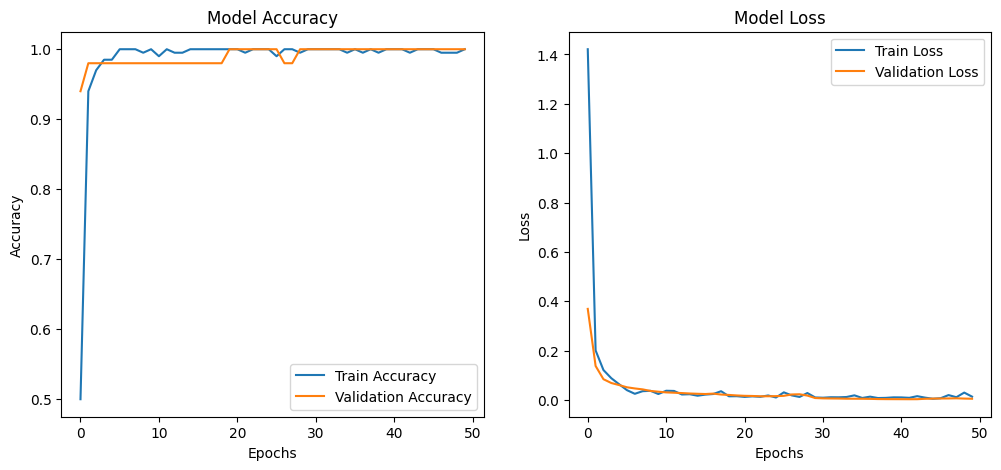

In [18]:
import matplotlib.pyplot as plt

# Assuming 'history' is the output of model.fit()
plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


Train Accuracy: 1.0
Test Accuracy: 0.9800000190734863
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


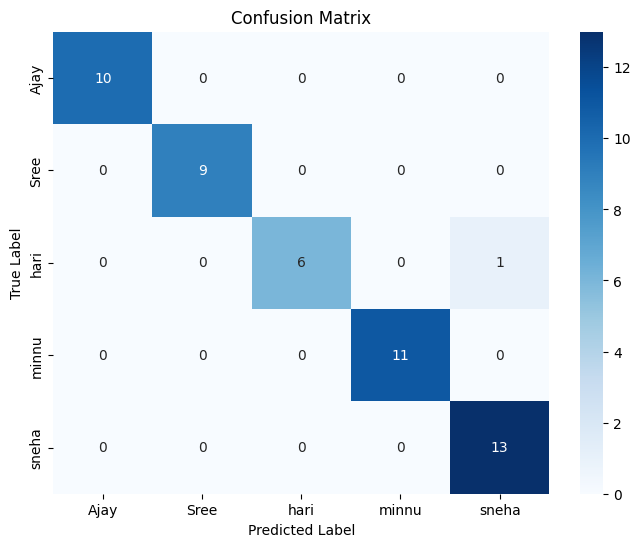

              precision    recall  f1-score   support

        Ajay       1.00      1.00      1.00        10
        Sree       1.00      1.00      1.00         9
        hari       1.00      0.86      0.92         7
       minnu       1.00      1.00      1.00        11
       sneha       0.93      1.00      0.96        13

    accuracy                           0.98        50
   macro avg       0.99      0.97      0.98        50
weighted avg       0.98      0.98      0.98        50



In [69]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.metrics import classification_report

train_acc = dnn_model.evaluate(X_train, y_train, verbose=0)[1]
test_acc = dnn_model.evaluate(X_test, y_test, verbose=0)[1]
print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

# Predict on test set for confusion matrix
y_pred_probs = dnn_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Evaluation on an image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
Predicted Label: sneha
Confidence Score: 0.9999435


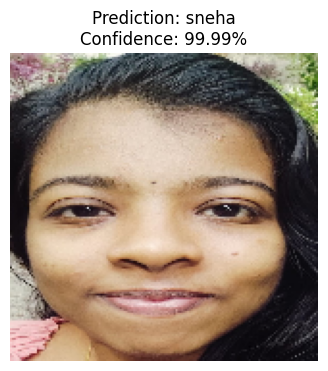

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess a single test image
test_img_path = '/kaggle/input/facenet-data/test.jpg'  # Replace with your test image path
test_img = cv2.imread(test_img_path)
if test_img is None:
    raise ValueError(f"Image not found at {test_img_path}")
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
test_img = cv2.resize(test_img, (160, 160))  # Resize to FaceNet's expected input size

# Define the predict_face function (adjusted for DNN)
def predict_face(image, embedder, datagen, clf, le, scaler, n_augmentations=5):
    """Predict face label and confidence score using a trained DNN model"""
    # Generate FaceNet embeddings
    emb = embedder.embeddings([image])[0]  # Get first embedding, ensure 1D array of 512
    emb_scaled = scaler.transform([emb])   # Standardize embeddings (shape: (1, 512))
    
    # Get class probabilities using clf.predict (DNN model)
    prob = clf.predict(emb_scaled)[0]      # Shape: (5,) for 5 classes
    
    # Get predicted label and confidence
    predicted_class_idx = np.argmax(prob)  # Index of highest probability
    predicted_label = le.inverse_transform([predicted_class_idx])[0]  # Convert to label
    confidence = prob[predicted_class_idx]  # Confidence score
    
    return predicted_label, confidence

# Predict label and confidence
predicted_label, confidence = predict_face(test_img, embedder, datagen, dnn_model, le, scaler)

# If confidence is below 50%, classify as "Unfamiliar"
if confidence < 0.50:
    predicted_label = "Unfamiliar"

# Print results
print("Predicted Label:", predicted_label)
print("Confidence Score:", confidence)

# Visualize the test image with the prediction
plt.figure(figsize=(4, 4))
plt.imshow(test_img)
plt.title(f"Prediction: {predicted_label}\nConfidence: {confidence*100:.2f}%")
plt.axis('off')
plt.show()

# Save Model

In [22]:
import os

# Define save path
save_dir = "facenet/DNN/"
os.makedirs(save_dir, exist_ok=True)  # Ensure directory exists

DNN_model_file = os.path.join(save_dir, "DNN_face_recognition.h5")

# Save the Keras model correctly
dnn_model.save(DNN_model_file)

print(f"Saved DNN model to {DNN_model_file}")


Saved DNN model to facenet/DNN/DNN_face_recognition.h5


# TCN

In [64]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define TCN block
def TCNBlock(filters, kernel_size, dilation_rate):
    return keras.Sequential([
        layers.Conv1D(filters, kernel_size, padding="causal", dilation_rate=dilation_rate, activation='relu'),
        layers.BatchNormalization(),
        layers.SpatialDropout1D(0.3)
    ])

# Build TCN model
input_layer = keras.Input(shape=(X.shape[1], 1))  # Reshape embeddings for 1D processing
x = TCNBlock(64, kernel_size=3, dilation_rate=1)(input_layer)
x = TCNBlock(128, kernel_size=3, dilation_rate=2)(x)
x = TCNBlock(256, kernel_size=3, dilation_rate=4)(x)
x = layers.GlobalAveragePooling1D()(x)  # Feature aggregation
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.3)(x)
output_layer = layers.Dense(len(le.classes_), activation='softmax')(x)

# Compile Model
tcn_model = keras.Model(inputs=input_layer, outputs=output_layer)
tcn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

tcn_model.summary()


Model: "functional_84"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_24 (InputLayer)          │ (None, 512, 1)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_7 (Sequential)            │ (None, 512, 64)             │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_8 (Sequential)            │ (None, 512, 128)            │          25,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_9 (Sequential)            │ (None, 512, 256)            │          99,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_2           │ (None, 256)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 158,853 (620.52 KB)

 Trainable params: 157,957 (617.02 KB)

 Non-trainable params: 896 (3.50 KB)

In [65]:
# Reshape embeddings for 1D CNN processing
X_train_reshaped = X_train[..., None]  # Adding a channel dimension
X_test_reshaped = X_test[..., None]


In [68]:
# Train model
history = tcn_model.fit(
    X_train_reshaped, y_train, 
    validation_data=(X_test_reshaped, y_test), 
    epochs=50, 
    batch_size=32
)


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8109 - loss: 0.6202 - val_accuracy: 0.4400 - val_loss: 1.5736
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7831 - loss: 0.7103 - val_accuracy: 0.7200 - val_loss: 0.8440
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7927 - loss: 0.5815 - val_accuracy: 0.7200 - val_loss: 0.9015
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7939 - loss: 0.5661 - val_accuracy: 0.6800 - val_loss: 1.1227
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7839 - loss: 0.5679 - val_accuracy: 0.7200 - val_loss: 0.9512
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7905 - loss: 0.5924 - val_accuracy: 0.6800 - val_loss: 0.9111
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7979 - loss: 0.5528 - val_accuracy: 0.8200 - val_loss: 0.6539
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7531 - loss: 0.6306 - val_accuracy: 0.7600 - val_loss: 0.8939


In [69]:
# Evaluate the model
train_acc = tcn_model.evaluate(X_train_reshaped, y_train, verbose=0)[1]
test_acc = tcn_model.evaluate(X_test_reshaped, y_test, verbose=0)[1]

print(f"Train Accuracy: {train_acc * 100:.2f}%")
print(f"Test Accuracy: {test_acc * 100:.2f}%")


Train Accuracy: 89.50%
Test Accuracy: 84.00%


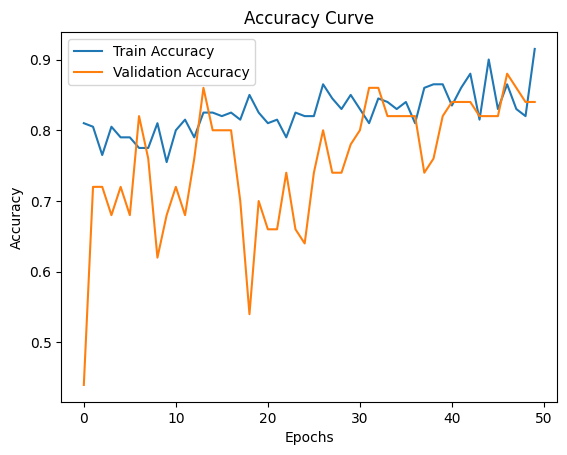

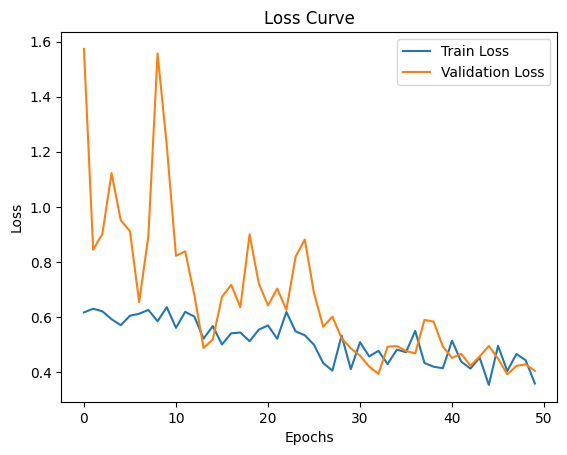

In [70]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve")
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()
plt.show()


In [92]:
import os

# Define save path
save_dir = "facenet/TCN/"
os.makedirs(save_dir, exist_ok=True)  # Ensure directory exists

TCN_file = os.path.join(save_dir, "TCN_face_recognition.h5")

# Save the Keras model correctly
tcn_model.save(TCN_file)

print(f"Saved TCN model to {TCN_file}")

Saved TCN model to facenet/TCN/TCN_face_recognition.h5


Train Accuracy: 0.7350000143051147
Test Accuracy: 0.6000000238418579
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


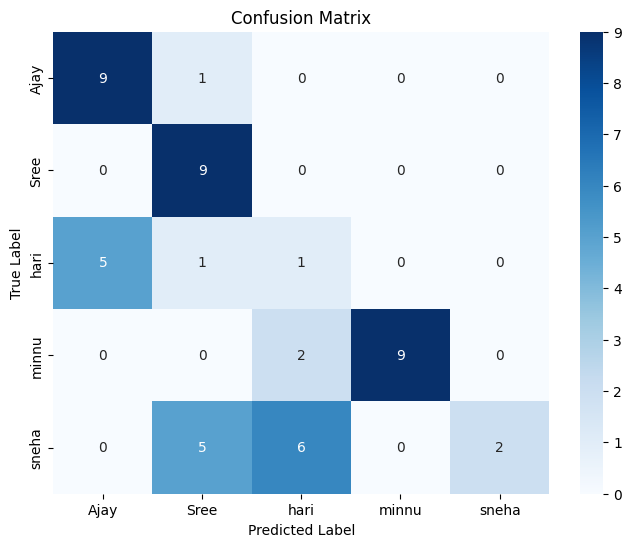

              precision    recall  f1-score   support

        Ajay       0.64      0.90      0.75        10
        Sree       0.56      1.00      0.72         9
        hari       0.11      0.14      0.12         7
       minnu       1.00      0.82      0.90        11
       sneha       1.00      0.15      0.27        13

    accuracy                           0.60        50
   macro avg       0.66      0.60      0.55        50
weighted avg       0.73      0.60      0.56        50



In [70]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.metrics import classification_report

train_acc = tcn_model.evaluate(X_train_reshaped, y_train, verbose=0)[1]
test_acc = tcn_model.evaluate(X_test_reshaped, y_test, verbose=0)[1]
print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

# Predict on test set for confusion matrix
y_pred_probs = tcn_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred, target_names=le.classes_))

FaceNet embeddings are already highly meaningful.

FaceNet produces well-separated embeddings. Using a temporal-based architecture (TCN) on non-sequential 1D vectors might not be ideal.
Conv1D might not work well for embeddings.

1D CNNs work best with sequential time-series data, not static feature vectors like FaceNet embeddings.
Lack of a well-structured feature extractor.

The network might be too shallow to learn proper class separations from embeddings.
Dataset imbalance or too many classes.

If your dataset has imbalanced classes, the model might be predicting the most frequent class.
Try checking the class distribution.

# Deep Residual Fully Connected Network
Instead of a plain DNN, use ResNet-style skip connections.


X_train shape: (200, 512)


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12            │ (None, 512)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 512)            │        262,656 │ input_layer_12[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_8     │ (None, 512)            │          2,048 │ dense_7[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_4 (Dropout)       │ (None, 512)            │              0 │ batch_normalization_8… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_8 (Dense)           │ (None, 512)            │        262,656 │ dropout_4[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_9     │ (None, 512)            │          2,048 │ dense_8[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_5 (Dropout)       │ (None, 512)            │              0 │ batch_normalization_9… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_63 (Add)              │ (None, 512)            │              0 │ dropout_4[0][0],       │
│                           │                        │                │ dropout_5[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_9 (Dense)           │ (None, 256)            │        131,328 │ add_63[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_10    │ (None, 256)            │          1,024 │ dense_9[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_6 (Dropout)       │ (None, 256)            │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_10 (Dense)          │ (None, 5)              │          1,285 │ dropout_6[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 663,045 (2.53 MB)

 Trainable params: 660,485 (2.52 MB)

 Non-trainable params: 2,560 (10.00 KB)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 535ms/step - accuracy: 0.5566 - loss: 1.2118 - val_accuracy: 0.9800 - val_loss: 0.0450
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9867 - loss: 0.0458 - val_accuracy: 1.0000 - val_loss: 0.0117
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9931 - loss: 0.0235 - val_accuracy: 1.0000 - val_loss: 0.0048
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9931 - loss: 0.0187 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9963 - loss: 0.0106 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0057 - val_accuracy: 1.0000 - val_loss: 0.0010
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9973 - loss: 0.0068 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 

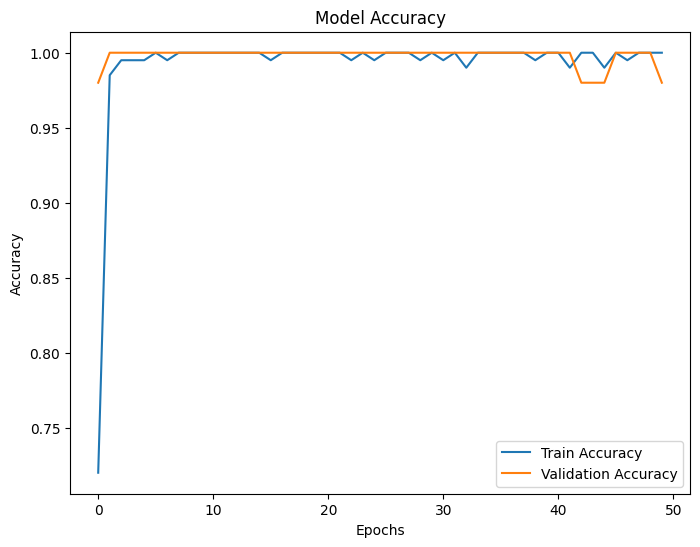

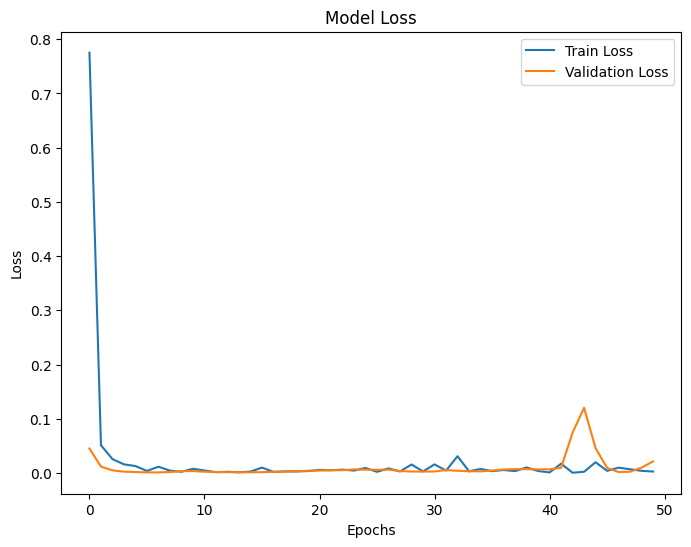

In [33]:
from tensorflow.keras import layers, models
import numpy as np

def build_residual_dnn(input_dim, num_classes):
    inputs = layers.Input(shape=(input_dim,))
    x = layers.Dense(512, activation='relu')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.4)(x)

    # Residual Connection
    res = layers.Dense(512, activation='relu')(x)
    res = layers.BatchNormalization()(res)
    res = layers.Dropout(0.4)(res)
    x = layers.Add()([x, res])  # Skip connection

    x = layers.Dense(256, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)

    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model

# Ensure X_train and le.classes_ exist
if 'X_train' not in locals() or 'le' not in locals():
    raise ValueError("X_train and le must be defined before building the model.")

# Check shape
print("X_train shape:", X_train.shape)
if len(X_train.shape) == 1:
    X_train = X_train.reshape(-1, 1)
    X_test = X_test.reshape(-1, 1)

# Ensure sparse labels
if len(y_train.shape) > 1:
    y_train = np.argmax(y_train, axis=1)
    y_test = np.argmax(y_test, axis=1)

# Build model
model = build_residual_dnn(X_train.shape[1], len(le.classes_))
model.summary()

# Compile and train
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
import matplotlib.pyplot as plt

# Train the model and store history
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    epochs=50, batch_size=32, verbose=1)

# Plot Training & Validation Accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Plot Training & Validation Loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

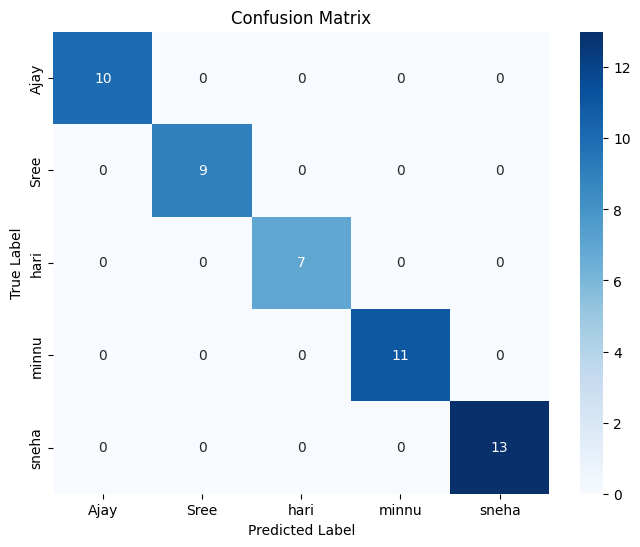

              precision    recall  f1-score   support

        Ajay       1.00      1.00      1.00        10
        Sree       1.00      1.00      1.00         9
        hari       1.00      1.00      1.00         7
       minnu       1.00      1.00      1.00        11
       sneha       1.00      1.00      1.00        13

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [36]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.metrics import classification_report




# If y_test and y_pred are already class labels (not one-hot)
y_pred_classes = np.argmax(y_test, axis=1) if len(y_test.shape) > 1 else y_test
y_true = np.argmax(y_test, axis=1) if len(y_test.shape) > 1 else y_test

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=le.classes_))



In [37]:
import os

# Define save path
save_dir = "facenet/RDNN/"
os.makedirs(save_dir, exist_ok=True)  # Ensure directory exists

DNN_model_file = os.path.join(save_dir, "RDNN_face_recognition.h5")

# Save the Keras model correctly
dnn_model.save(DNN_model_file)

print(f"Saved DNN model to {DNN_model_file}")


Saved DNN model to facenet/RDNN/RDNN_face_recognition.h5


In [43]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model

# Load trained model
model = load_model("/kaggle/working/facenet/RDNN/RDNN_face_recognition.h5")  # Ensure this path is correct

# Load scaler and label encoder (used during training)
import joblib
scaler = joblib.load("/kaggle/working/facenet/embeddings/scaler.pkl")  # StandardScaler or MinMaxScaler used in training
le = joblib.load("/kaggle/working/facenet/embeddings/label_encoder.pkl")  # LabelEncoder for classes

# Load and preprocess the test image
def preprocess_image(image_path, embedder, scaler):
    """Convert an image to a numerical feature vector"""
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Image not found: {image_path}")
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, (160, 160))  # Resize to match FaceNet input

    # Generate FaceNet embeddings
    embedding = embedder.embeddings([img])  # Ensure output is (1, feature_dim)

    # Scale features using the same scaler from training
    embedding_scaled = scaler.transform(embedding)

    return embedding_scaled

# Load FaceNet model for feature extraction
from keras_facenet import FaceNet
embedder = FaceNet()

# Provide image path
test_img_path = "/kaggle/input/facenet-data/test2.jpeg"  # Replace with your actual test image

# Preprocess
test_embedding = preprocess_image(test_img_path, embedder, scaler)


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


In [44]:
# Predict class probabilities
probabilities = model.predict(test_embedding)  # Output shape: (1, num_classes)

# Get predicted label
predicted_class_idx = np.argmax(probabilities)  # Highest probability index
predicted_label = le.inverse_transform([predicted_class_idx])[0]  # Convert index to label
confidence = probabilities[0, predicted_class_idx]  # Confidence score

# If confidence is below 50%, classify as "Unfamiliar"
if confidence < 0.50:
    predicted_label = "Unfamiliar"

# Display results
print(f"Predicted Label: {predicted_label}")
print(f"Confidence Score: {confidence*100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
Predicted Label: Sree
Confidence Score: 99.99%


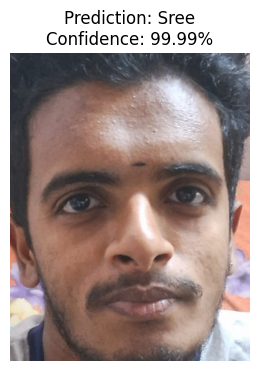

In [45]:
import matplotlib.pyplot as plt

# Load image for display
img = cv2.imread(test_img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB

plt.figure(figsize=(4, 4))
plt.imshow(img)
plt.title(f"Prediction: {predicted_label}\nConfidence: {confidence*100:.2f}%")
plt.axis('off')
plt.show()


# Rest-DNN
✅ Skip connections improve gradient flow and prevent vanishing gradients.
✅ Batch normalization & dropout help generalization.
✅ Deeper layers capture richer face features.

In [46]:
import tensorflow as tf
from tensorflow.keras import layers, models, backend as K

def soft_thresholding(x):
    """Soft thresholding function to reduce noise in residual connections."""
    abs_x = K.abs(x)
    threshold = K.mean(abs_x, axis=-1, keepdims=True)
    return K.sign(x) * K.maximum(abs_x - threshold, 0)

def build_rest_dnn(input_dim, num_classes):
    inputs = layers.Input(shape=(input_dim,))
    
    # Initial Dense Layer
    x = layers.Dense(512, activation='relu')(inputs)
    x = layers.BatchNormalization()(x)
    
    # Residual Shrinkage Block
    res = layers.Dense(512, activation='relu')(x)
    res = layers.BatchNormalization()(res)
    res = layers.Lambda(soft_thresholding)(res)  # Shrinkage operation
    x = layers.Add()([x, res])  # Skip connection
    
    # More FC layers
    x = layers.Dense(256, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Dense(128, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)
    
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    
    res_model = models.Model(inputs, outputs)
    res_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    res_model.summary()
    return res_model


In [47]:
res_model = build_rest_dnn(X_train.shape[1], len(le.classes_))
history = res_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)


Model: "functional_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_17            │ (None, 512)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_11 (Dense)          │ (None, 512)            │        262,656 │ input_layer_17[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_11    │ (None, 512)            │          2,048 │ dense_11[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_12 (Dense)          │ (None, 512)            │        262,656 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_12    │ (None, 512)            │          2,048 │ dense_12[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_147 (Lambda)       │ (None, 512)            │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_148 (Add)             │ (None, 512)            │              0 │ batch_normalization_1… │
│                           │                        │                │ lambda_147[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_13 (Dense)          │ (None, 256)            │        131,328 │ add_148[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_13    │ (None, 256)            │          1,024 │ dense_13[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_7 (Dropout)       │ (None, 256)            │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_14 (Dense)          │ (None, 128)            │         32,896 │ dropout_7[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_14    │ (None, 128)            │            512 │ dense_14[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_8 (Dropout)       │ (None, 128)            │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_15 (Dense)          │ (None, 5)              │            645 │ dropout_8[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 695,813 (2.65 MB)

 Trainable params: 692,997 (2.64 MB)

 Non-trainable params: 2,816 (11.00 KB)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 556ms/step - accuracy: 0.6043 - loss: 1.0599 - val_accuracy: 0.9600 - val_loss: 0.2446
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9981 - loss: 0.0451 - val_accuracy: 0.9800 - val_loss: 0.1030
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0254 - val_accuracy: 1.0000 - val_loss: 0.0601
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0165 - val_accuracy: 1.0000 - val_loss: 0.0370
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0164 - val_accuracy: 1.0000 - val_loss: 0.0247
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0122 - val_accuracy: 1.0000 - val_loss: 0.0208
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0066 - val_accuracy: 1.0000 - val_loss: 0.0186
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0145 - val_accuracy: 1.0000 - val_loss: 0.0159
Epoch 

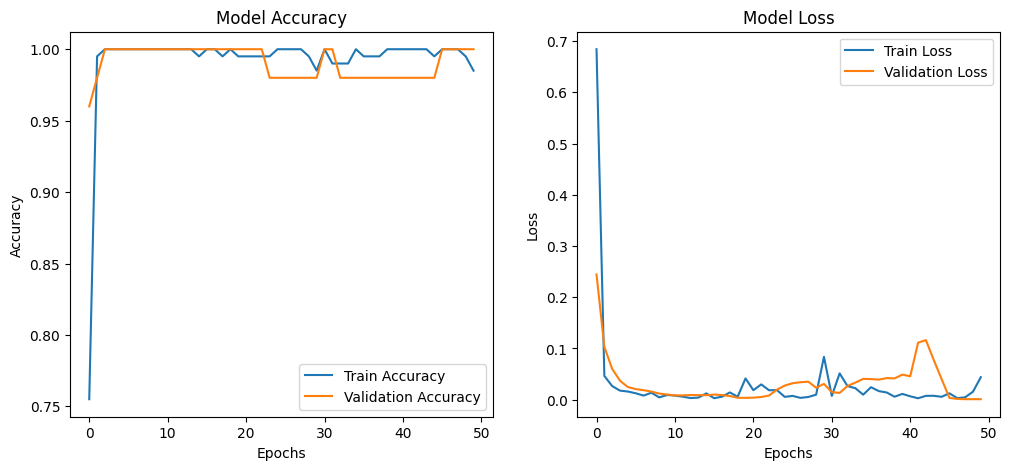

In [48]:
import matplotlib.pyplot as plt

# Assuming 'history' is the output of model.fit()
plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


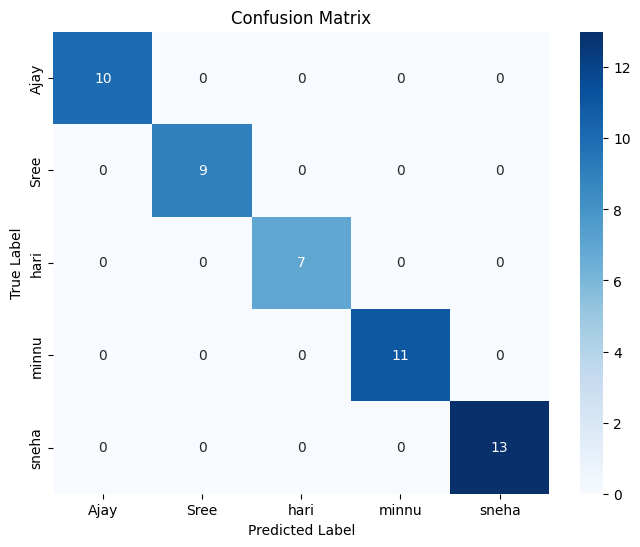

              precision    recall  f1-score   support

        Ajay       1.00      1.00      1.00        10
        Sree       1.00      1.00      1.00         9
        hari       1.00      1.00      1.00         7
       minnu       1.00      1.00      1.00        11
       sneha       1.00      1.00      1.00        13

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [50]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.metrics import classification_report




# If y_test and y_pred are already class labels (not one-hot)
y_pred_classes = np.argmax(y_test, axis=1) if len(y_test.shape) > 1 else y_test
y_true = np.argmax(y_test, axis=1) if len(y_test.shape) > 1 else y_test

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=le.classes_))



In [51]:
import os

# Define save path
save_dir = "facenet/RestDNN/"
os.makedirs(save_dir, exist_ok=True)  # Ensure directory exists

DNN_model_file = os.path.join(save_dir, "RestDNN_face_recognition.h5")

# Save the Keras model correctly
dnn_model.save(DNN_model_file)

print(f"Saved DNN model to {DNN_model_file}")


Saved DNN model to facenet/RestDNN/RestDNN_face_recognition.h5


In [53]:
import numpy as np
import cv2
import joblib
from tensorflow.keras.models import load_model
from keras_facenet import FaceNet
import albumentations as A  # For image augmentation

# Load trained model
model = load_model("/kaggle/working/facenet/RestDNN/RestDNN_face_recognition.h5")

# Load scaler and label encoder
scaler = joblib.load("/kaggle/working/facenet/embeddings/scaler.pkl")
le = joblib.load("/kaggle/working/facenet/embeddings/label_encoder.pkl")

# Load FaceNet model for feature extraction
embedder = FaceNet()

# Define augmentation pipeline
augmentations = A.Compose([
    A.HorizontalFlip(p=0.5),  # Random flip
    A.Rotate(limit=20, p=0.5),  # Rotate randomly between -20 and +20 degrees
    A.RandomBrightnessContrast(p=0.5)  # Adjust brightness & contrast
])

# Load and preprocess image with augmentation
def preprocess_and_augment(image_path, embedder, scaler, n_augmentations=5):
    """Generate multiple augmented embeddings from an image"""
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Image not found: {image_path}")

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, (160, 160))  # Resize to FaceNet's expected size

    embeddings = []
    
    for _ in range(n_augmentations):
        augmented_img = augmentations(image=img)['image']  # Apply augmentation
        emb = embedder.embeddings([augmented_img])  # Extract embedding
        embeddings.append(emb[0])  # Store the 1D embedding

    # Scale embeddings
    embeddings_scaled = scaler.transform(embeddings)
    
    return embeddings_scaled  # Returns multiple embeddings

# Provide image path
test_img_path = "/kaggle/input/facenet-data/test1.jpg"

# Generate embeddings from augmented images
test_embeddings = preprocess_and_augment(test_img_path, embedder, scaler)

# Predict on each augmented embedding
predictions = model.predict(test_embeddings)  # Shape: (n_augmentations, num_classes)

# Average predictions across augmentations
avg_probabilities = np.mean(predictions, axis=0)

# Get predicted label
predicted_class_idx = np.argmax(avg_probabilities)  # Highest probability index
predicted_label = le.inverse_transform([predicted_class_idx])[0]  # Convert index to label
confidence = avg_probabilities[predicted_class_idx]  # Confidence score

# If confidence is below 50%, classify as "Unfamiliar"
if confidence < 0.50:
    predicted_label = "Unfamiliar"

# Display results
print(f"Predicted Label: {predicted_label}")
print(f"Confidence Score: {confidence*100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
Predicted Label: hari
Confidence Score: 99.85%


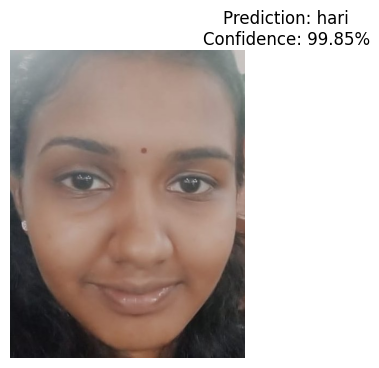

In [54]:
import matplotlib.pyplot as plt

# Load and display original image
img = cv2.imread(test_img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Define figure size
plt.figure(figsize=(8, 4))

# Plot original image
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.axis("off")
# Display both images
plt.suptitle(f"Prediction: {predicted_label}\nConfidence: {confidence*100:.2f}%", fontsize=12)
plt.show()


# Test with unfamiliar image

In [58]:
import numpy as np
import cv2
import joblib
from tensorflow.keras.models import load_model
from keras_facenet import FaceNet
import albumentations as A  # For image augmentation

# Load trained model
model = load_model("/kaggle/working/facenet/DNN/DNN_face_recognition.h5")

# Load scaler and label encoder
scaler = joblib.load("/kaggle/working/facenet/embeddings/scaler.pkl")
le = joblib.load("/kaggle/working/facenet/embeddings/label_encoder.pkl")

# Load FaceNet model for feature extraction
embedder = FaceNet()

# Define augmentation pipeline
augmentations = A.Compose([
    A.HorizontalFlip(p=0.5),  # Random flip
    A.Rotate(limit=20, p=0.5),  # Rotate randomly between -20 and +20 degrees
    A.RandomBrightnessContrast(p=0.5)  # Adjust brightness & contrast
])

# Load and preprocess image with augmentation
def preprocess_and_augment(image_path, embedder, scaler, n_augmentations=5):
    """Generate multiple augmented embeddings from an image"""
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Image not found: {image_path}")

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, (160, 160))  # Resize to FaceNet's expected size

    embeddings = []
    
    for _ in range(n_augmentations):
        augmented_img = augmentations(image=img)['image']  # Apply augmentation
        emb = embedder.embeddings([augmented_img])  # Extract embedding
        embeddings.append(emb[0])  # Store the 1D embedding

    # Scale embeddings
    embeddings_scaled = scaler.transform(embeddings)
    
    return embeddings_scaled  # Returns multiple embeddings

# Provide image path
test_img_path = "/kaggle/input/facenet-data/test3.jpg"

# Generate embeddings from augmented images
test_embeddings = preprocess_and_augment(test_img_path, embedder, scaler)

# Predict on each augmented embedding
predictions = model.predict(test_embeddings)  # Shape: (n_augmentations, num_classes)

# Average predictions across augmentations
avg_probabilities = np.mean(predictions, axis=0)

# Get predicted label
predicted_class_idx = np.argmax(avg_probabilities)  # Highest probability index
predicted_label = le.inverse_transform([predicted_class_idx])[0]  # Convert index to label
confidence = avg_probabilities[predicted_class_idx]  # Confidence score

# If confidence is below 50%, classify as "Unfamiliar"
if confidence < 0.60:
    predicted_label = "Unfamiliar"

# Display results
print(f"Predicted Label: {predicted_label}")
print(f"Confidence Score: {confidence*100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
Predicted Label: Unfamiliar
Confidence Score: 53.85%


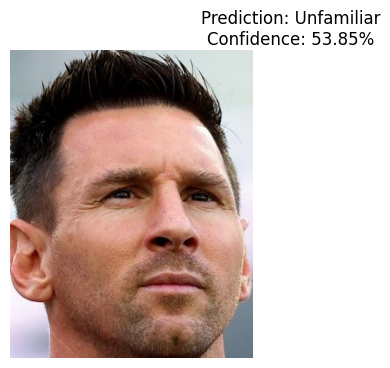

In [59]:
import matplotlib.pyplot as plt

# Load and display original image
img = cv2.imread(test_img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Define figure size
plt.figure(figsize=(8, 4))

# Plot original image
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.axis("off")
# Display both images
plt.suptitle(f"Prediction: {predicted_label}\nConfidence: {confidence*100:.2f}%", fontsize=12)
plt.show()


In [60]:
import numpy as np
import cv2
import joblib
from tensorflow.keras.models import load_model
from keras_facenet import FaceNet
import albumentations as A  # For image augmentation

# Load trained model
model = load_model("/kaggle/working/facenet/RDNN/RDNN_face_recognition.h5")

# Load scaler and label encoder
scaler = joblib.load("/kaggle/working/facenet/embeddings/scaler.pkl")
le = joblib.load("/kaggle/working/facenet/embeddings/label_encoder.pkl")

# Load FaceNet model for feature extraction
embedder = FaceNet()

# Define augmentation pipeline
augmentations = A.Compose([
    A.HorizontalFlip(p=0.5),  # Random flip
    A.Rotate(limit=20, p=0.5),  # Rotate randomly between -20 and +20 degrees
    A.RandomBrightnessContrast(p=0.5)  # Adjust brightness & contrast
])

# Load and preprocess image with augmentation
def preprocess_and_augment(image_path, embedder, scaler, n_augmentations=5):
    """Generate multiple augmented embeddings from an image"""
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Image not found: {image_path}")

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, (160, 160))  # Resize to FaceNet's expected size

    embeddings = []
    
    for _ in range(n_augmentations):
        augmented_img = augmentations(image=img)['image']  # Apply augmentation
        emb = embedder.embeddings([augmented_img])  # Extract embedding
        embeddings.append(emb[0])  # Store the 1D embedding

    # Scale embeddings
    embeddings_scaled = scaler.transform(embeddings)
    
    return embeddings_scaled  # Returns multiple embeddings

# Provide image path
test_img_path = "/kaggle/input/facenet-data/test3.jpg"

# Generate embeddings from augmented images
test_embeddings = preprocess_and_augment(test_img_path, embedder, scaler)

# Predict on each augmented embedding
predictions = model.predict(test_embeddings)  # Shape: (n_augmentations, num_classes)

# Average predictions across augmentations
avg_probabilities = np.mean(predictions, axis=0)

# Get predicted label
predicted_class_idx = np.argmax(avg_probabilities)  # Highest probability index
predicted_label = le.inverse_transform([predicted_class_idx])[0]  # Convert index to label
confidence = avg_probabilities[predicted_class_idx]  # Confidence score

# If confidence is below 50%, classify as "Unfamiliar"
if confidence < 0.60:
    predicted_label = "Unfamiliar"

# Display results
print(f"Predicted Label: {predicted_label}")
print(f"Confidence Score: {confidence*100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
Predicted Label: Unfamiliar
Confidence Score: 49.25%


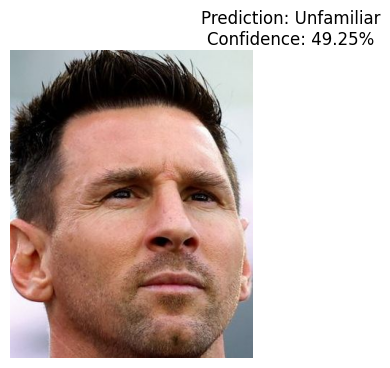

In [61]:
import matplotlib.pyplot as plt

# Load and display original image
img = cv2.imread(test_img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Define figure size
plt.figure(figsize=(8, 4))

# Plot original image
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.axis("off")
# Display both images
plt.suptitle(f"Prediction: {predicted_label}\nConfidence: {confidence*100:.2f}%", fontsize=12)
plt.show()


In [62]:
import numpy as np
import cv2
import joblib
from tensorflow.keras.models import load_model
from keras_facenet import FaceNet
import albumentations as A  # For image augmentation

# Load trained model
model = load_model("/kaggle/working/facenet/RestDNN/RestDNN_face_recognition.h5")

# Load scaler and label encoder
scaler = joblib.load("/kaggle/working/facenet/embeddings/scaler.pkl")
le = joblib.load("/kaggle/working/facenet/embeddings/label_encoder.pkl")

# Load FaceNet model for feature extraction
embedder = FaceNet()

# Define augmentation pipeline
augmentations = A.Compose([
    A.HorizontalFlip(p=0.5),  # Random flip
    A.Rotate(limit=20, p=0.5),  # Rotate randomly between -20 and +20 degrees
    A.RandomBrightnessContrast(p=0.5)  # Adjust brightness & contrast
])

# Load and preprocess image with augmentation
def preprocess_and_augment(image_path, embedder, scaler, n_augmentations=5):
    """Generate multiple augmented embeddings from an image"""
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Image not found: {image_path}")

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, (160, 160))  # Resize to FaceNet's expected size

    embeddings = []
    
    for _ in range(n_augmentations):
        augmented_img = augmentations(image=img)['image']  # Apply augmentation
        emb = embedder.embeddings([augmented_img])  # Extract embedding
        embeddings.append(emb[0])  # Store the 1D embedding

    # Scale embeddings
    embeddings_scaled = scaler.transform(embeddings)
    
    return embeddings_scaled  # Returns multiple embeddings

# Provide image path
test_img_path = "/kaggle/input/facenet-data/test3.jpg"

# Generate embeddings from augmented images
test_embeddings = preprocess_and_augment(test_img_path, embedder, scaler)

# Predict on each augmented embedding
predictions = model.predict(test_embeddings)  # Shape: (n_augmentations, num_classes)

# Average predictions across augmentations
avg_probabilities = np.mean(predictions, axis=0)

# Get predicted label
predicted_class_idx = np.argmax(avg_probabilities)  # Highest probability index
predicted_label = le.inverse_transform([predicted_class_idx])[0]  # Convert index to label
confidence = avg_probabilities[predicted_class_idx]  # Confidence score

# If confidence is below 50%, classify as "Unfamiliar"
if confidence < 0.60:
    predicted_label = "Unfamiliar"

# Display results
print(f"Predicted Label: {predicted_label}")
print(f"Confidence Score: {confidence*100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
Predicted Label: Unfamiliar
Confidence Score: 49.96%


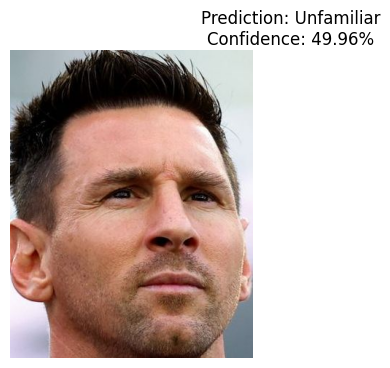

In [63]:
import matplotlib.pyplot as plt

# Load and display original image
img = cv2.imread(test_img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Define figure size
plt.figure(figsize=(8, 4))

# Plot original image
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.axis("off")
# Display both images
plt.suptitle(f"Prediction: {predicted_label}\nConfidence: {confidence*100:.2f}%", fontsize=12)
plt.show()


In [86]:
import numpy as np
import cv2
import joblib
from tensorflow.keras.models import load_model
from keras_facenet import FaceNet
import albumentations as A  # For image augmentation

# Load trained model
model = load_model("/kaggle/working/facenet/TCN/TCN_face_recognition.h5")

# Load scaler and label encoder
scaler = joblib.load("/kaggle/working/facenet/embeddings/scaler.pkl")
le = joblib.load("/kaggle/working/facenet/embeddings/label_encoder.pkl")

# Load FaceNet model for feature extraction
embedder = FaceNet()

# Define augmentation pipeline
augmentations = A.Compose([
    A.HorizontalFlip(p=0.5),  # Random flip
    A.Rotate(limit=20, p=0.5),  # Rotate randomly between -20 and +20 degrees
    A.RandomBrightnessContrast(p=0.5)  # Adjust brightness & contrast
])

# Load and preprocess image with augmentation
def preprocess_and_augment(image_path, embedder, scaler, n_augmentations=5):
    """Generate multiple augmented embeddings from an image"""
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Image not found: {image_path}")

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, (160, 160))  # Resize to FaceNet's expected size

    embeddings = []
    
    for _ in range(n_augmentations):
        augmented_img = augmentations(image=img)['image']  # Apply augmentation
        emb = embedder.embeddings([augmented_img])  # Extract embedding
        embeddings.append(emb[0])  # Store the 1D embedding

    # Scale embeddings
    embeddings_scaled = scaler.transform(embeddings)
    
    return embeddings_scaled  # Returns multiple embeddings

# Provide image path
test_img_path = "/kaggle/input/facenet-data/test3.jpg"

# Generate embeddings from augmented images
test_embeddings = preprocess_and_augment(test_img_path, embedder, scaler)

# Predict on each augmented embedding
predictions = model.predict(test_embeddings)  # Shape: (n_augmentations, num_classes)

# Average predictions across augmentations
avg_probabilities = np.mean(predictions, axis=0)

# Get predicted label
predicted_class_idx = np.argmax(avg_probabilities)  # Highest probability index
predicted_label = le.inverse_transform([predicted_class_idx])[0]  # Convert index to label
confidence = avg_probabilities[predicted_class_idx]  # Confidence score

# If confidence is below 50%, classify as "Unfamiliar"
if confidence < 0.60:
    predicted_label = "Unfamiliar"

# Display results
print(f"Predicted Label: {predicted_label}")
print(f"Confidence Score: {confidence*100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
Predicted Label: hari
Confidence Score: 62.47%


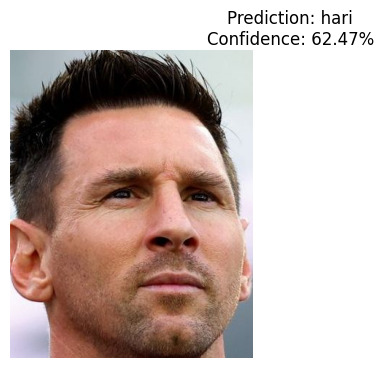

In [87]:
import matplotlib.pyplot as plt

# Load and display original image
img = cv2.imread(test_img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Define figure size
plt.figure(figsize=(8, 4))

# Plot original image
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.axis("off")
# Display both images
plt.suptitle(f"Prediction: {predicted_label}\nConfidence: {confidence*100:.2f}%", fontsize=12)
plt.show()


In [93]:
import shutil

shutil.make_archive("/kaggle/working/working_dir", "zip", "/kaggle/working/")


'/kaggle/working/working_dir.zip'